# **Titanic Dataset Analysis Project**

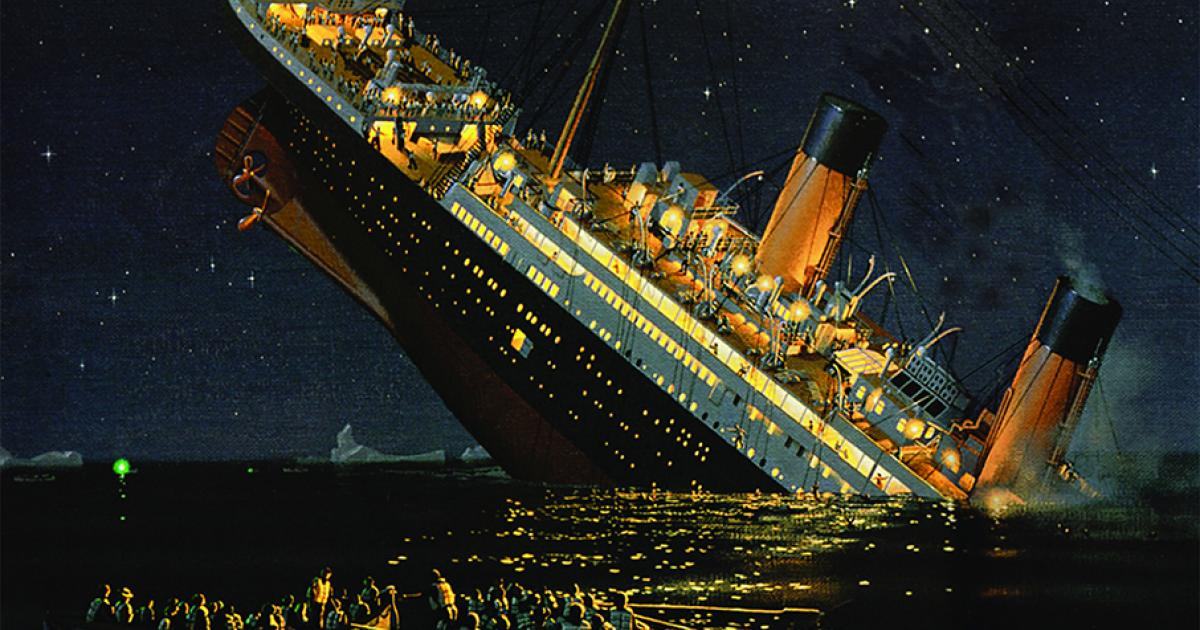

## **Table of Contents**
- [1. Brief Description of the Dataset](#1-brief-description-of-the-dataset)
- [2. Data Exploration](#2-data-exploration)
  - [2.1 Load the Dataset](#21-load-the-dataset)
  - [2.2 Check for Missing Values and Data Types](#22-check-for-missing-values-and-data-types)
  - [2.3 Generate Summary Statistics](#23-generate-summary-statistics)
  - [2.4 Data Visualization](#24-data-visualization)
  - [2.5 Filtering Data by Key Features](#27-filtering-data-by-key-features)
  - [2.6 Correlation Analysis for Numerical Features](#26-correlation-analysis-for-numerical-features)
- [3. Data Cleaning and Feature Engineering](#3-data-cleaning-and-feature-engineering)
  - [3.1 Handling Missing Values and Encoding Variables](#31-handling-missing-values-and-encoding-variables)
  - [3.2 Handling Outliers](#32-handling-outliers)
  - [3.3 Features Creation](#33-feature-creation)
  - [3.4 Normalization/Scaling](#34-normalizationscaling)
- [4. Key Findings and Insights](#4-key-findings-and-insights)
- [5. Hypotheses Formulation](#5-hypotheses-formulation)
  - [5.1 Hypothesis 1](#51-hypothesis-1)
  - [5.2 Hypothesis 2](#52-hypothesis-2)
  - [5.3 Hypothesis 3](#53-hypothesis-3)

  

## 1. Brief Description of the Dataset 


## <img align="left" src="image\t.png" style=" width:130px; margin: -10px 20px 5px 20px; " > [***Titanic Dataset***](https://www.kaggle.com/c/titanic/overview)


The Titanic dataset contains information about passengers aboard the Titanic. It includes details such as age, gender, passenger class, and whether they survived the shipwreck.


<img align="Right" src="image\boat.png" style="width:160px; height:130px; margin: -30px 500px 40px 0px;">


<span style="font-size: 24px; "> *what sorts of people were more likely to survive?* 



**Dataset Attributes**

- `PassengerId`: Unique ID for each passenger  
- `Survived`: Survival status (0 = No, 1 = Yes)   ` The Target`
- `Pclass`: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)  
- `Name`: Name of the passenger  
- `Sex`: Gender of the passenger  
- `Age`: Age of the passenger  
- `SibSp`: Number of siblings/spouses aboard the Titanic  
- `Parch`: Number of parents/children aboard the Titanic  
- `Ticket`: Ticket number  
- `Fare`: Ticket fare (in currency of the time)  
- `Cabin`: Cabin number  
- `Embarked`: Port of embarkation (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton)

## 2. Data Exploration <img align="left" src="image\e.png" style="width:70px; height:60px; margin:5px 20px 5px 5px;">


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats

### 2.1 Load the Dataset
- Load the Titanic dataset and inspect its structure.

In [2]:
df_train = pd.read_csv('data/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test= pd.read_csv('data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
df_train.shape

(891, 12)

In [6]:
df_train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### 2.2 Check for Missing Values and Data Types
- Identify columns with missing values and check data types.

In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_train.duplicated().sum()

0

In [10]:
df_train.index.is_unique

True

### 2.3 Generate Summary Statistics
- Provide summary statistics for numerical features.

In [11]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Skewness and Kurtosis

**Skewness**:
  - Measures the asymmetry of the distribution of data.
  - **Positive skewness**: Tail on the right side is longer (more high values).
  - **Negative skewness**: Tail on the left side is longer (more low values).
  - **Zero skewness**: Data is balanced and symmetrical.

**Kurtosis**:
  - Measures the "tailedness" or "flatness" of the distribution.
  - **Kurtosis value around 3**: Normal distribution (like a bell curve).
  - **Kurtosis greater than 3**: Distribution is peaked with heavy tails (more outliers).
  - **Kurtosis less than 3**: Distribution is flatter with lighter tails (fewer outliers).


In [12]:
# Select only numerical columns
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [13]:
df_train[numerical_columns].skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [14]:
df_train[numerical_columns].kurtosis()

PassengerId    -1.200000
Survived       -1.775005
Pclass         -1.280015
Age             0.178274
SibSp          17.880420
Parch           9.778125
Fare           33.398141
dtype: float64

### 2.4 Data Visualization
<img align="left" src="image\v.png" style="width:100px; height:90px; margin: 60px 40px 30px 10px;  ">&nbsp;

- **Count Plots**: Displays the frequency of categorical variables.
- **Pie Charts**: Shows the proportion of categories in a dataset.
- **Strip Plot**: Visualizes the distribution of a categorical feature against a numerical feature.
- **Histograms**: Shows the distribution of a numerical feature.
- **Violin Plots**: Combines box plot and kernel density plot to show the distribution of numerical data across different categories.
- **Scatter Plots**: Visualizes the relationship between two numerical features.
- **Pair Plots**: Shows pairwise relationships in a dataset by plotting all numerical features against each other.


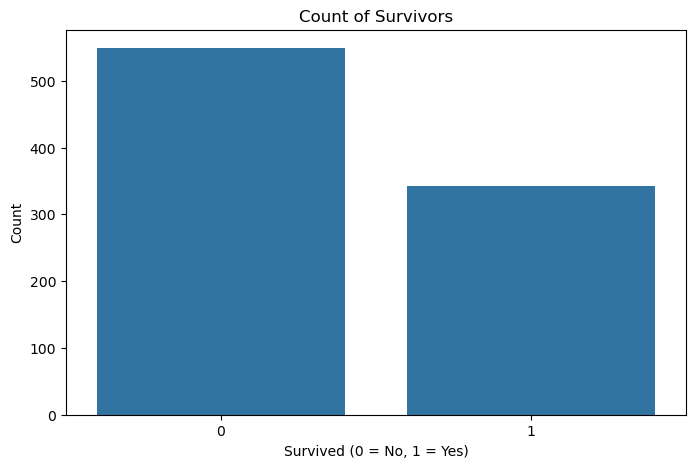

In [15]:
# Count Plot for Survived
plt.figure(figsize=(8, 5))
sns.countplot(df_train, x='Survived')
plt.title('Count of Survivors')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

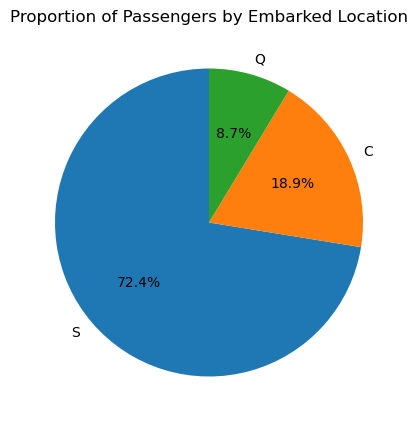

In [16]:
# Pie Chart for Embarked
plt.figure(figsize=(8, 5))
df_train['Embarked'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Passengers by Embarked Location')
plt.ylabel('')
plt.show()

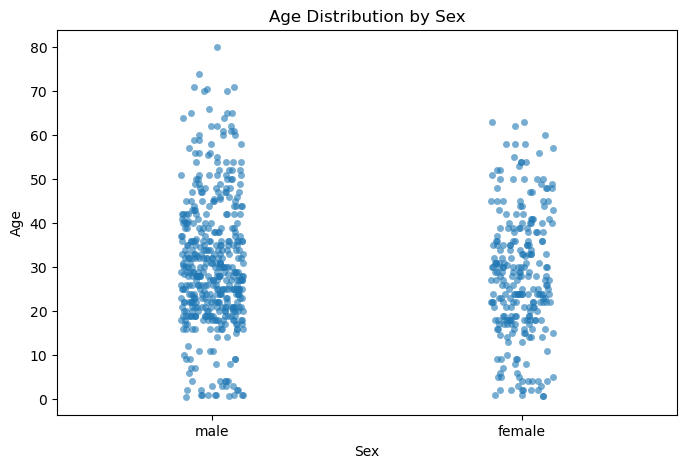

In [17]:
# Strip Plot for Age vs Sex
plt.figure(figsize=(8, 5))
sns.stripplot(df_train, x='Sex', y='Age', jitter=True, alpha=0.6)
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

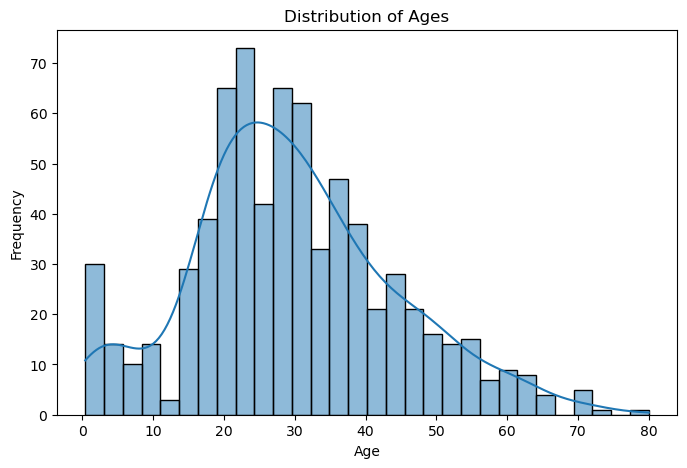

In [18]:
# Histogram for Age
plt.figure(figsize=(8, 5))
sns.histplot(df_train['Age'], bins=30, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

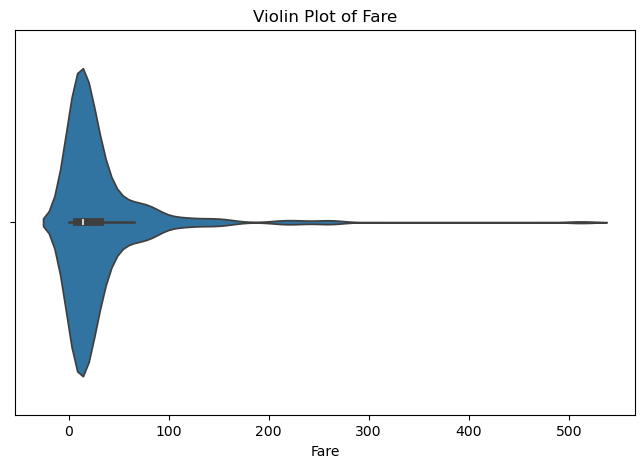

In [19]:
# Violin Plot for Fare
plt.figure(figsize=(8, 5))
sns.violinplot(df_train, x='Fare')
plt.title('Violin Plot of Fare')
plt.xlabel('Fare')
plt.show()

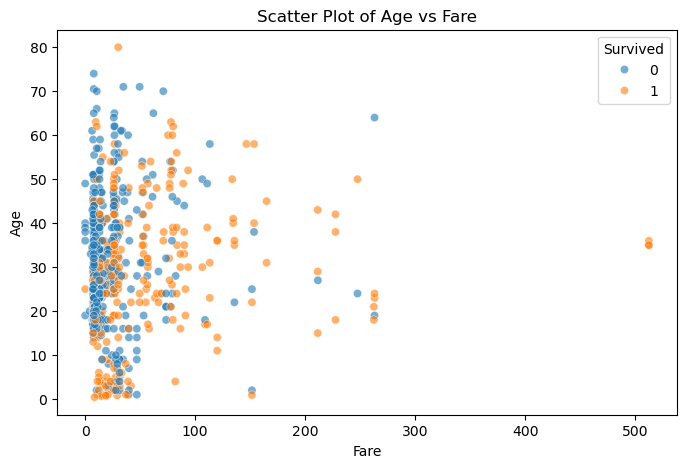

In [20]:
# Scatter Plot for Age vs Fare
plt.figure(figsize=(8, 5))
sns.scatterplot(df_train, x='Fare', y='Age', hue='Survived', alpha=0.6)
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

<Figure size 1000x1000 with 0 Axes>

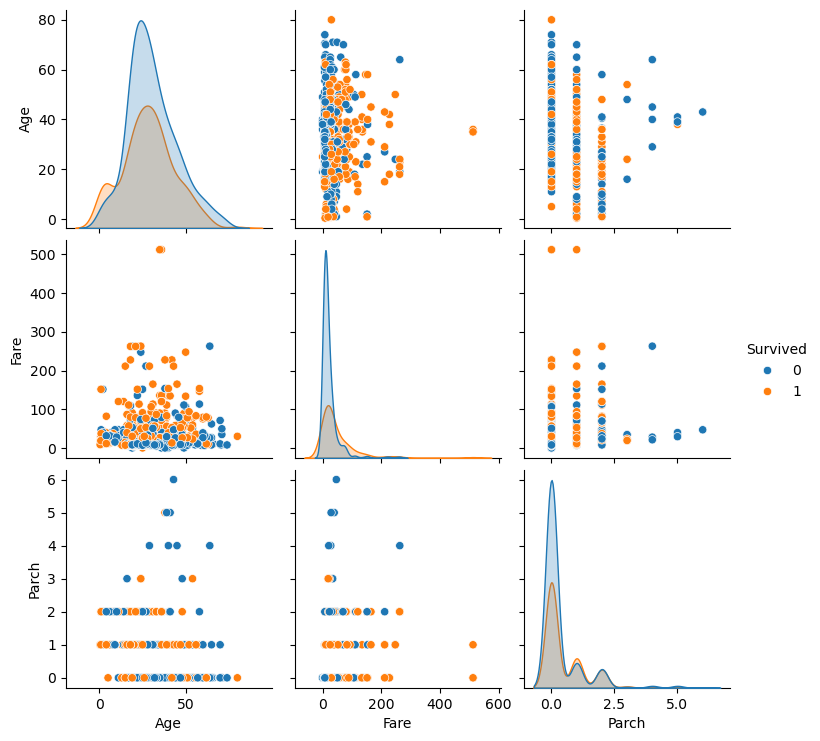

In [21]:
# Pair Plot for Numerical Features
plt.figure(figsize=(10, 10))
sns.pairplot(df_train, vars=['Age', 'Fare', 'Parch'], hue='Survived')
plt.show()

### 2.5 Filtering Data by Key Features <img align="left" src="image\file.png" style="width:90px; height:80px; margin:5px 20px 5px 5px;">

Survival Counts by Gender

In [22]:
# Group by Sex and Survival
df_train.groupby(['Sex', 'Survived']).size().unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


In [23]:
# other way using pandas
pd.crosstab(df_train['Sex'], df_train['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: xlabel='Sex'>

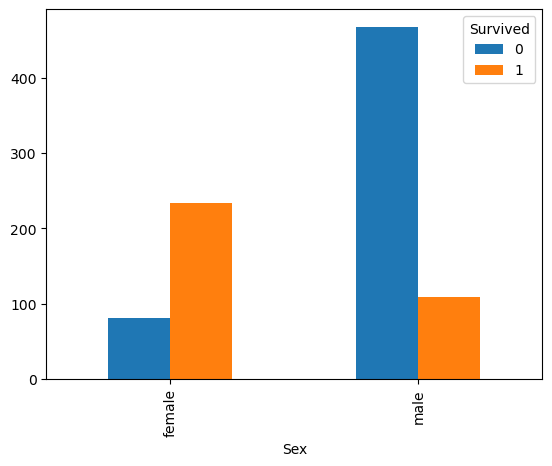

In [24]:
# Count Plot for Survived by Sex
pd.crosstab(df_train['Sex'], df_train['Survived']).plot(kind='bar')

 Survival Counts by Passenger Class

In [25]:
# Group by Pclass and Survival
df_train.groupby('Pclass')['Survived'].value_counts().unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [26]:
# other way using pandas
pd.crosstab(df_train['Pclass'], df_train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Pclass'>

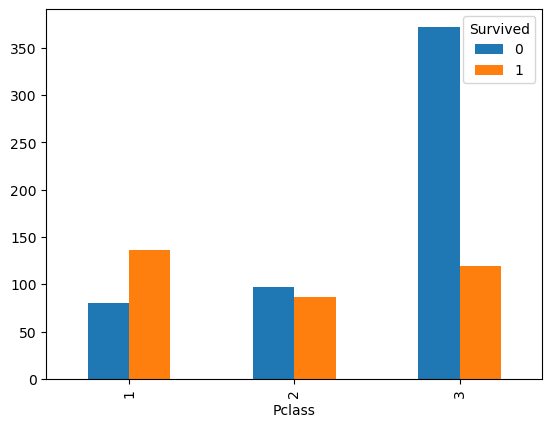

In [27]:
# Count Plot for Survived by Pclass
pd.crosstab(df_train['Pclass'], df_train['Survived']).plot(kind='bar')

### 2.7 Correlation Analysis for Numerical Features
- Calculate and visualize correlations using a heatmap.
- A **correlation heatmap** is a visual tool that shows the relationships between numerical features in a dataset.
- It uses colors to indicate how strongly two variables are related:
  - `1` means a perfect positive correlation (both increase together).
  - `-1` means a perfect negative correlation (one increases while the other decreases).
  - `0` means no correlation (no relationship).
- Darker colors indicate stronger relationships, while lighter colors show weaker ones.
- This helps identify patterns and understand which features might be similar or important for predicting outcomes.


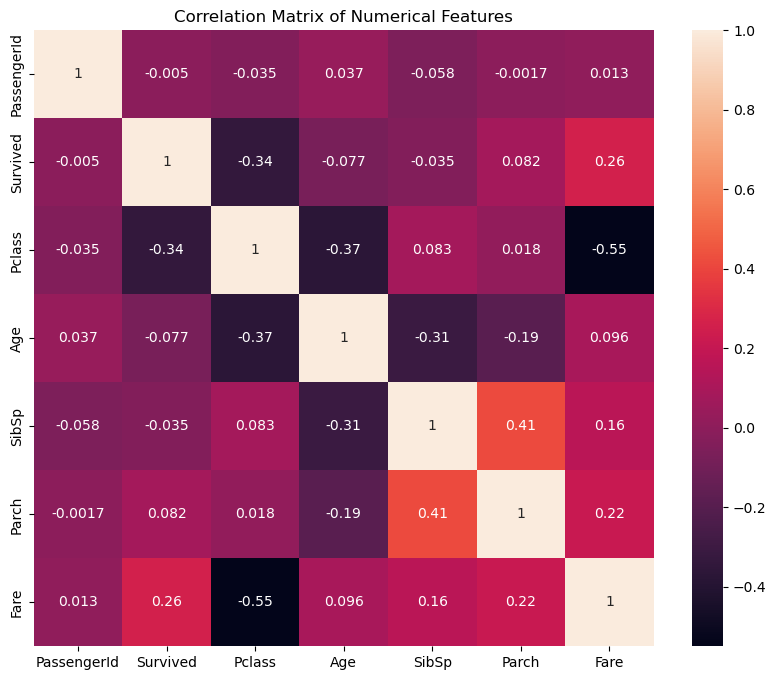

In [28]:
# Calculate the correlations
numerical_df = df_train.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_df.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## 3. Data Cleaning and Feature Engineering <img align="left" src="image\c.png" style="width:80px; height:70px; margin:5px 20px 5px 5px;">

In [29]:
df_cleaned = df_train.copy()

### 3.1  Handling Missing Values and Encoding Variables

In [30]:
MissingVal_att = ['Age','Cabin','Embarked']
df_cleaned[MissingVal_att].isnull().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

In [31]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

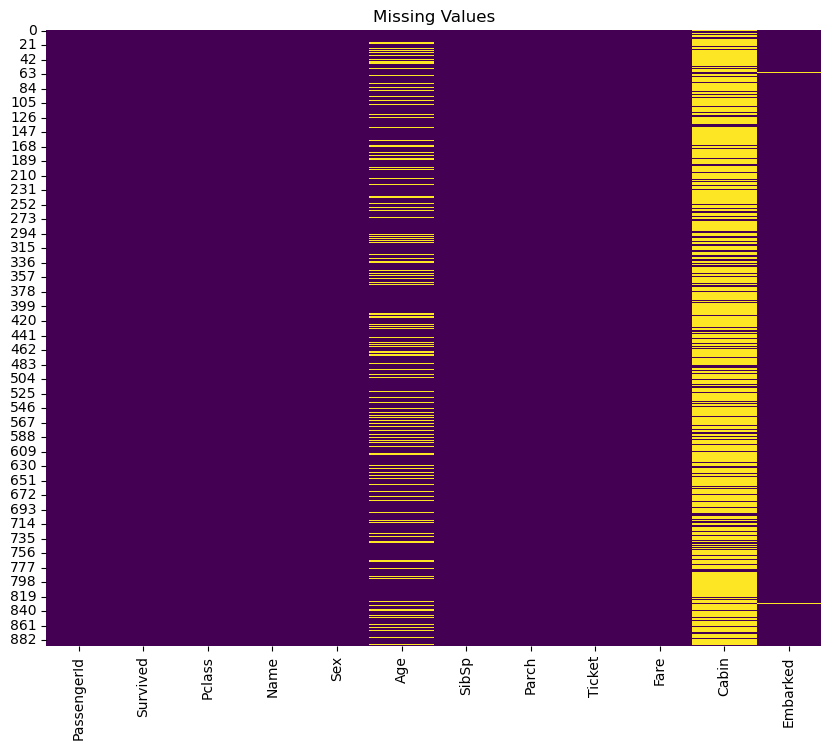

In [32]:
# plot Missing Values by heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values')
plt.show()

*Lets Start with the features that have the fewest missing values.*

Using **mode imputation** for the missing values in the `Embarked` and `Age` columns because there were only a few missing values.

In [33]:
df_cleaned['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [34]:
mode= df_cleaned['Embarked'].mode()[0]
mode

'S'

In [35]:
df_cleaned.fillna({'Embarked':mode},inplace=True)
df_test.fillna({'Fare':df_test['Fare'].mode()[0]},inplace=True)
df_cleaned['Embarked'].isnull().sum()


0

Since there is a high correlation between age and class, I will fill the missing values in the `Age` column by grouping with `Pclass`, assuming that similar age groups likely booked particular classes of tickets on the ship.


In [36]:
# Using transform to calculate the mean age for each Pclass 
mean= df_cleaned.groupby('Pclass')['Age'].transform('mean')
mean

0      25.140620
1      38.233441
2      25.140620
3      38.233441
4      25.140620
         ...    
886    29.877630
887    38.233441
888    25.140620
889    38.233441
890    25.140620
Name: Age, Length: 891, dtype: float64

In [37]:
df_cleaned['Age'] = df_cleaned['Age'].fillna(mean)
df_test['Age'] = df_test['Age'].fillna(mean)
df_cleaned['Age'].isnull().sum()

0

In [38]:
df_cleaned['Sex'] = LabelEncoder().fit_transform(df_cleaned['Sex'])
df_test['Sex'] = LabelEncoder().fit_transform(df_test['Sex'])
df_cleaned['Sex'] 

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [39]:
df_cleaned['Embarked'] = LabelEncoder().fit_transform(df_cleaned['Embarked'])
df_test['Embarked'] = LabelEncoder().fit_transform(df_test['Embarked'])
df_cleaned['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

In [40]:
df_cleaned['Name'] = df_cleaned['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_test['Name'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_cleaned['Name']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [41]:
df_cleaned['Name'] = LabelEncoder().fit_transform(df_cleaned['Name'])
df_test['Name'] = LabelEncoder().fit_transform(df_test['Name'])
df_cleaned['Name']

0      12
1      13
2       9
3      13
4      12
       ..
886    15
887     9
888     9
889    12
890    12
Name: Name, Length: 891, dtype: int32

In [42]:
df_cleaned = df_cleaned.drop(columns=['Ticket'])
df_test = df_test.drop(columns=['Ticket'])

*Finally, for the `Cabin Number` feature, I will use a method that I honestly didn't use before.*

predicting the missing values based on other features in the dataset.

So for prediction of null values the spliting of data will be :

- `X_train`: Dataset except Cabin column features with non null values.
- `y_train`: rows from Cabin column with non null values.
- `X_test`: Dataset except Cabin column features with null values.

In [43]:
df_cleaned['Cabin'].isnull()

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

In [44]:
df_nonNull = df_cleaned[df_cleaned['Cabin'].isnull()==False]
df_nonNull.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [45]:
df_Null = df_cleaned[df_cleaned['Cabin'].isnull()==True]
df_test_Null = df_test[df_test['Cabin'].isnull()==True]
df_Null.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [46]:
df_nonNull = df_nonNull.drop(columns='Survived')
df_nonNull.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [47]:
df_Null= df_Null.drop(columns='Survived')
df_Null.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [48]:
X_train = df_nonNull.drop('Cabin',axis=1).values
y_train = df_nonNull['Cabin'].values
X_test = df_Null.drop('Cabin',axis=1).values
X_testdf = df_test_Null.drop('Cabin',axis=1).values
print(X_train.shape,y_train.shape,X_test.shape)

(204, 9) (204,) (687, 9)


In [49]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_test = model.predict(X_testdf)
y_pred

array(['F G73', 'E10', 'E10', 'F38', 'G6', 'G6', 'D', 'F G73', 'F2', 'G6',
       'D', 'F4', 'D56', 'G6', 'F G73', 'D56', 'G6', 'G6', 'G6', 'F G73',
       'F38', 'F G73', 'C49', 'F G73', 'E77', 'B49', 'C83', 'F G73',
       'F G73', 'G6', 'G6', 'G6', 'F33', 'F38', 'F2', 'F G73', 'F G73',
       'G6', 'F G73', 'F E69', 'G6', 'F4', 'F G73', 'F33', 'E101',
       'F G73', 'F2', 'C23 C25 C27', 'F G73', 'C23 C25 C27', 'C52', 'G6',
       'F G73', 'G6', 'G6', 'D56', 'C23 C25 C27', 'D56', 'D', 'E10',
       'F G73', 'E10', 'F2', 'E101', 'F G73', 'E10', 'F G73', 'A6',
       'E101', 'G6', 'F2', 'E10', 'F G73', 'E10', 'F G73', 'G6', 'F G63',
       'E10', 'D', 'D56', 'E101', 'F G73', 'E10', 'E10', 'E10', 'F G73',
       'F G73', 'E10', 'F E69', 'G6', 'F G73', 'G6', 'D', 'F G73', 'F38',
       'D56', 'G6', 'C2', 'E10', 'D', 'D', 'F G73', 'F G73', 'F G63',
       'E10', 'F G73', 'G6', 'F33', 'D56', 'D', 'F G73', 'G6', 'F G73',
       'G6', 'F G73', 'F33', 'F2', 'F G73', 'F4', 'D', 'D', 'E10', 'G

In [50]:
df_cleaned.loc[df_cleaned['Cabin'].isnull(), 'Cabin'] = y_pred
df_test.loc[df_test['Cabin'].isnull(), 'Cabin'] =y_pred_test
df_cleaned['Cabin'].isnull().sum()

0

In [51]:
df_cleaned['Cabin'] = LabelEncoder().fit_transform(df_cleaned['Cabin'])
df_test['Cabin'] = LabelEncoder().fit_transform(df_test['Cabin'])
print(df_cleaned['Cabin'].head())

0    140
1     81
2    115
3     55
4    115
Name: Cabin, dtype: int32


### 3.2 Handling Outliers

<Axes: ylabel='Fare'>

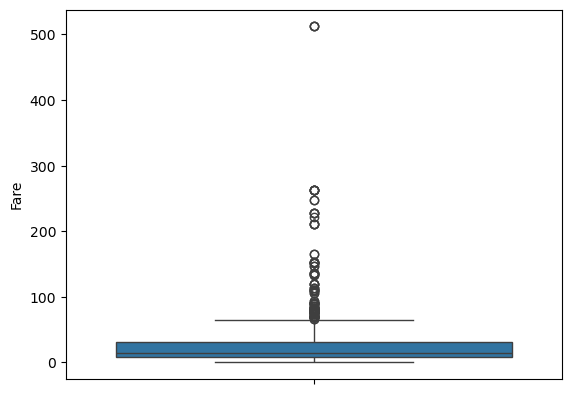

In [52]:
sns.boxplot(df_cleaned['Fare'])

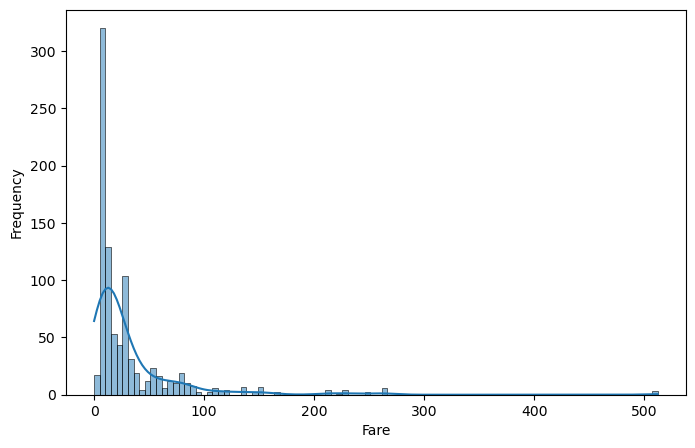

In [53]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Fare'], bins=100, kde=True)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [54]:
Q1 = df_cleaned['Fare'].quantile(0.25)
Q3 = df_cleaned['Fare'].quantile(0.75)
IQR = Q3 - Q1
IQR

23.0896

In [55]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)

-26.724 65.6344


In [56]:
fare_mean = df_cleaned['Fare'].mean()
df_cleaned.loc[df_cleaned['Fare'] < lower_bound, 'Fare'] = fare_mean
df_cleaned.loc[df_cleaned['Fare'] > upper_bound, 'Fare'] = fare_mean


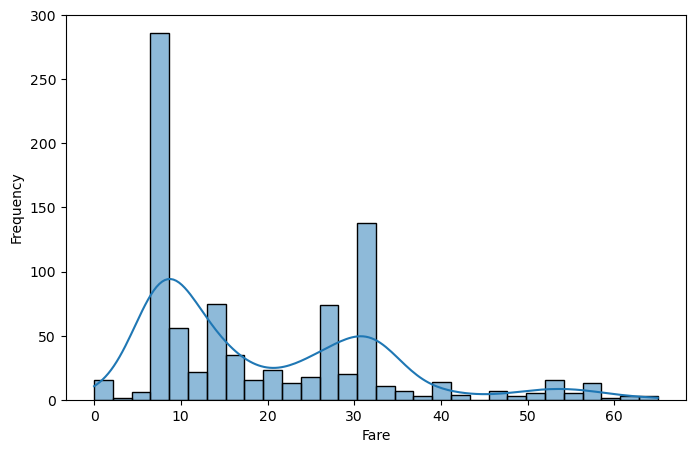

In [57]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Fare'], bins=30, kde=True)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

### 3.3 Features Creation

 Age Group Ranges

The `bins_age` list defines the boundaries for each age group as follows:

- **Children**: 0 to 12 years (ages 0–11)
- **Teenagers**: 12 to 18 years (ages 12–17)
- **Adults**: 18 to 35 years (ages 18–34)
- **Elderly**: 35 to 60 years (ages 35–59)
- **Senior**: 60 to 100 years (ages 60–99)

The `pd.cut` function assigns ages to these categories based on the defined bins. For example, any passenger with an age between 0 and 11 will be categorized as "Children."



In [58]:
# Define bins and labels for Age
bins_age = [0, 12, 18, 35, 60, 100]
labels_age = ['Children', 'Teenagers', 'Adults', 'Elderly', 'Senior']
df_cleaned['Age_Group'] = pd.cut(df_cleaned['Age'], bins=bins_age, labels=labels_age, right=False)
df_test['Age_Group'] = pd.cut(df_test['Age'], bins=bins_age, labels=labels_age, right=False)

In [59]:
df_cleaned[['Age', 'Age_Group']].head(10)

,Age,Age_Group
0,22.00000,Adults
1,38.00000,Elderly
2,26.00000,Adults
3,35.00000,Elderly
4,35.00000,Elderly
5,25.14062,Adults
6,54.00000,Elderly
7,2.00000,Children
8,27.00000,Adults
9,14.00000,Teenagers


In [60]:
# Group by Age_Group and Survival
df_cleaned.groupby('Age_Group', observed=False)['Survived'].value_counts().unstack()

Survived,0,1
Age_Group,,
Children,29,39
Teenagers,23,22
Adults,340,173
Elderly,138,101
Senior,19,7


<Axes: xlabel='Age_Group'>

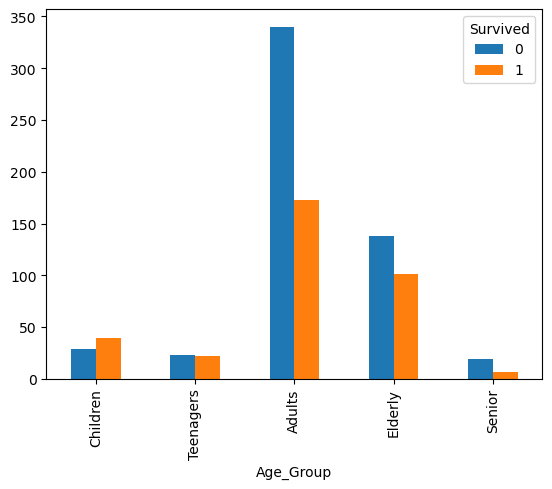

In [61]:

# Count Plot Survived by Age
pd.crosstab(df_cleaned['Age_Group'], df_cleaned['Survived']).plot(kind='bar')

 Fare Group Ranges

The `bins_fare` list defines the boundaries for each fare group as follows, considering the maximum fare of 65:

- **Low Fare**: 0 to 15
- **Medium Fare**: 15 to 30
- **High Fare**: 30 to 65

In [62]:
df_cleaned['Fare'].max()

65.0

In [63]:
bins_fare = [0, 15, 30, 66]
labels_fare = ['Low Fare', 'Medium Fare', 'High Fare']
df_cleaned['Fare_Group'] = pd.cut(df_cleaned['Fare'], bins=bins_fare, labels=labels_fare, right=False)
df_test['Fare_Group'] = pd.cut(df_test['Fare'], bins=bins_fare, labels=labels_fare, right=False)

In [64]:
df_cleaned[['Fare', 'Fare_Group']].head(10)

,Fare,Fare_Group
0,7.250000,Low Fare
1,32.204208,High Fare
2,7.925000,Low Fare
3,53.100000,High Fare
4,8.050000,Low Fare
5,8.458300,Low Fare
6,51.862500,High Fare
7,21.075000,Medium Fare
8,11.133300,Low Fare
9,30.070800,High Fare


In [65]:
# Group by Fare_Group and Survival
df_cleaned.groupby('Fare_Group', observed=False)['Survived'].value_counts().unstack()


Survived,0,1
Fare_Group,,
Low Fare,343,114
Medium Fare,107,87
High Fare,99,141


<Axes: xlabel='Fare_Group'>

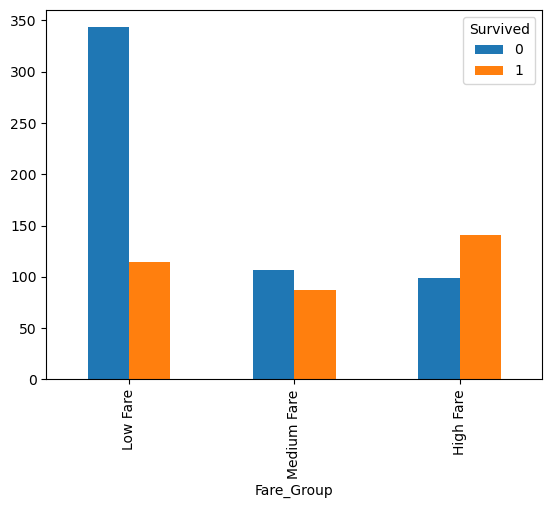

In [66]:
# Count Plot Survived by Fare
pd.crosstab(df_cleaned['Fare_Group'], df_cleaned['Survived']).plot(kind='bar')

In [67]:
df_cleaned.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked',
 'Age_Group',
 'Fare_Group']

In [68]:
df_cleaned['Age_Group'] = LabelEncoder().fit_transform(df_cleaned['Age_Group'])
df_test['Age_Group'] = LabelEncoder().fit_transform(df_test['Age_Group'])
df_cleaned['Age_Group']

0      0
1      2
2      0
3      2
4      2
      ..
886    0
887    0
888    0
889    0
890    0
Name: Age_Group, Length: 891, dtype: int32

In [69]:
df_cleaned['Fare_Group'] = LabelEncoder().fit_transform(df_cleaned['Fare_Group'])
df_test['Fare_Group'] = LabelEncoder().fit_transform(df_test['Fare_Group'])
df_cleaned['Fare_Group']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Name: Fare_Group, Length: 891, dtype: int32

### 3.4 Normalization/Scaling



I'll only scale numerical features like `Age` and `Fare`. Other features, such as `PassengerId`, `Survived`, and already encoded columns (e.g., `Pclass`, `Sex`, `SibSp`, `Parch`), are not scaled because they are categorical or identifiers.


In [70]:
df_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Group,Fare_Group
0,1,0,3,12,1,22.0,1,0,7.250000,140,2,0,1
1,2,1,1,13,0,38.0,1,0,32.204208,81,0,2,0
2,3,1,3,9,0,26.0,0,0,7.925000,115,2,0,1
3,4,1,1,13,0,35.0,1,0,53.100000,55,2,2,0
4,5,0,3,12,1,35.0,0,0,8.050000,115,2,2,1


In [71]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    int32  
 10  Embarked     891 non-null    int32  
 11  Age_Group    891 non-null    int32  
 12  Fare_Group   891 non-null    int32  
dtypes: float64(2), int32(6), int64(5)
memory usage: 69.7 KB


In [72]:
df_unscaled = df_cleaned.copy()
scaler = StandardScaler()
df_cleaned[['Age','Fare']] = scaler.fit_transform(df_cleaned[['Age','Fare']])
df_test[['Age','Fare']] = scaler.fit_transform(df_test[['Age','Fare']])

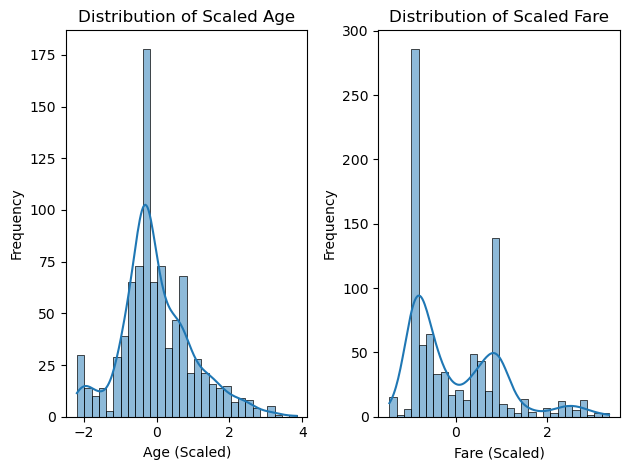

In [73]:
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Age'], bins=30, kde=True)
plt.title('Distribution of Scaled Age')
plt.xlabel('Age (Scaled)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Fare'], bins=30, kde=True)
plt.title('Distribution of Scaled Fare')
plt.xlabel('Fare (Scaled)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## 4. Key Findings and Insights



In [74]:
print("Total Survival Rate:\n", df_cleaned['Survived'].mean() * 100)

Total Survival Rate:
 38.38383838383838


**Passenger Class** "`Pclass`"
Indicates the socioeconomic status of passengers. There are three classes:
  - **1**: First class
  - **2**: Second class
  - **3**: Third class

In [75]:
print("Survival Rate by Pclass:\n", df_cleaned.groupby('Pclass')['Survived'].mean() * 100)

Survival Rate by Pclass:
 Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


**Gender** "`Sex`"
The gender of passengers, encoded as:
  - **0**: Female
  - **1**: Male

In [76]:
print("Survival Rate by Sex:\n", df_cleaned.groupby('Sex')['Survived'].mean() * 100)

Survival Rate by Sex:
 Sex
0    74.203822
1    18.890815
Name: Survived, dtype: float64


**Age** "`Age_Group`"  
Categorizes passengers into distinct age categories, encoded as:
  - **0**: Children
  - **1**: Teenager
  - **2**: Adults 
  - **3**: Elderly 
  - **4**: Seniors 


In [77]:
print("Survival Rate by Sex:\n", df_cleaned.groupby('Age_Group')['Survived'].mean() * 100)

Survival Rate by Sex:
 Age_Group
0    33.723197
1    57.352941
2    42.259414
3    26.923077
4    48.888889
Name: Survived, dtype: float64


**Embarked** "`Embarked`"  
Indicates the port of embarkation, encoded as:
  - **0**: Cherbourg (C)
  - **1**: Queenstown (Q)
  - **2**: Southampton (S)

In [78]:
print("Survival Rate by Sex:\n", df_cleaned.groupby('Embarked')['Survived'].mean() * 100)

Survival Rate by Sex:
 Embarked
0    55.357143
1    38.961039
2    33.900929
Name: Survived, dtype: float64


**Fare**  "`Fare_Group`"  
Segments passengers based on fare ranges, encoded as:
  - **0**: Low Fare
  - **1**: Medium Fare 
  - **2**: High Fare 

In [79]:
print("Survival Rate by Sex:\n", df_cleaned.groupby('Fare_Group')['Survived'].mean() * 100)

Survival Rate by Sex:
 Fare_Group
0    58.750000
1    24.945295
2    44.845361
Name: Survived, dtype: float64


## 5. Hypotheses Formulation
Hypothesis
- **Null Hypothesis (H0)**: There is no association between the categorical variables being tested.
- **Alternative Hypothesis (H1)**: There is an association between the categorical variables being tested.



- **P-Value**: Reflects the probability of observing the data, or something more extreme, assuming the null hypothesis is true. A p-value less than 0.05 suggests a significant relationship.

### 5.1 Hypothesis 1

In [80]:
contingency_table = df_cleaned.groupby(['Sex', 'Survived'], observed=False).size().unstack()
_, p_value, _, _ = stats.chi2_contingency(contingency_table)

if p_value < 0.05:
    print("Reject the null hypothesis: Female passengers were more likely to survive.")
else:
    print("Fail to reject the null hypothesis.")


Reject the null hypothesis: Female passengers were more likely to survive.



### 5.2 Hypothesis 2


In [81]:
# get the contingency table with pandas
contingency_table = pd.crosstab(df_cleaned['Pclass'], df_cleaned['Survived'])
_, p_value, _, _ = stats.chi2_contingency(contingency_table)

if p_value < 0.05:
    print("Reject the null hypothesis: first class passengers were more likely to survive.") 
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis: first class passengers were more likely to survive.



### 5.3 Hypothesis 3



In [82]:
contingency_table = pd.crosstab(df_cleaned['Age_Group'], df_cleaned['Survived'])
_, p_value, _, _ = stats.chi2_contingency(contingency_table)

if p_value < 0.05:
    print("Reject the null hypothesis: Age group had an effect on survival rates.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis: Age group had an effect on survival rates.


In [83]:
contingency_table = pd.crosstab(df_cleaned['Cabin'], df_cleaned['Survived'])
_, p_value, _, _ = stats.chi2_contingency(contingency_table)

if p_value < 0.05:
    print("Reject the null hypothesis: Age group had an effect on survival rates.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis: Age group had an effect on survival rates.


#### Saving The Cleaned Data

In [84]:
df_cleaned.to_csv('data/train_cleaned.csv', index=False)
df_test.to_csv('data/test_cleaned.csv', index=False)